<a href="https://colab.research.google.com/github/prajwalnigam321/final_test/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

In this case study we'll perform the following tasks
-  Feature Engineering and feature creation
-  Handling Missing values
-  Clean, sanitize and perform EDA
-  Perform hypotheis testing 
-  Prepare the data for further data processing pipeline and model building

In [1]:
!gdown 1lSJ5J1F-dN86PQTkQ_NOxWdIsbD0A1EX

Downloading...
From: https://drive.google.com/uc?id=1lSJ5J1F-dN86PQTkQ_NOxWdIsbD0A1EX
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 304MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import pylab
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


In [3]:
!ls

delhivery_data.csv  sample_data


In [4]:
df = pd.read_csv('delhivery_data.csv')

In [5]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
df.shape

(144867, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867.000000,144867,144867.000000,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,NaN,2,NaN,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,NaN,True,NaN,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,NaN,118749,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.262986,NaN,232.926567,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1037.012769,NaN,344.755577,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,9.000000,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.000000,NaN,22.000000,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.000000,NaN,66.000000,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1634.000000,NaN,286.000000,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


## Handling Missing Values

In [9]:
df.fillna('nan',inplace=True)

source_ids = list(df[df['source_name']=='nan']['source_center'].unique())
destination_ids = list(df[df['destination_name']=='nan']['destination_center'].unique())
source_ids.extend(destination_ids)
missing_ids = list(set(source_ids))
missing_ids

['IND282002AAD',
 'IND505326AAB',
 'IND465333A1B',
 'IND221005A1A',
 'IND577116AAA',
 'IND126116AAA',
 'IND122015AAC',
 'IND841301AAC',
 'IND250002AAC',
 'IND342902A1B',
 'IND509103AAC',
 'IND852118A1B',
 'IND331022A1B',
 'IND331001A1C']

In [10]:
len(missing_ids)

14

In [11]:
mapper = {}
counter=0
def missing(source_name,source_center,destination_name,destination_center):
    if ((source_center in missing_ids) and (source_name!='nan')):
        mapper[source_center]=source_name
    if ((destination_center in missing_ids) and (destination_center!='nan')):
        mapper[destination_center]=destination_name
    
df.apply(lambda x: missing(x.source_name,x.source_center,x.destination_name,x.destination_name),axis=1)
print(len(mapper))

0


In [12]:
counter=0

for a in missing_ids:
    if a not in mapper:
        mapper[a]='location_'+str(counter)+ '('+str(counter)+')'
        counter+=1
mapper

{'IND282002AAD': 'location_0(0)',
 'IND505326AAB': 'location_1(1)',
 'IND465333A1B': 'location_2(2)',
 'IND221005A1A': 'location_3(3)',
 'IND577116AAA': 'location_4(4)',
 'IND126116AAA': 'location_5(5)',
 'IND122015AAC': 'location_6(6)',
 'IND841301AAC': 'location_7(7)',
 'IND250002AAC': 'location_8(8)',
 'IND342902A1B': 'location_9(9)',
 'IND509103AAC': 'location_10(10)',
 'IND852118A1B': 'location_11(11)',
 'IND331022A1B': 'location_12(12)',
 'IND331001A1C': 'location_13(13)'}

In [13]:
def handling_missing(source_name,source_center,destination_name,destination_center):
    if source_center in mapper and source_name == 'nan':
        source_name=mapper[source_center]
    if destination_center in mapper and destination_name == 'nan':
        destination_name = mapper[destination_center]
    return source_name,destination_name


In [14]:
df[['source_name','destination_name']]=df.apply(lambda x: pd.Series((
    handling_missing(x.source_name,x.source_center,x.destination_name,x.destination_center)[0],
    handling_missing(x.source_name,x.source_center,x.destination_name,x.destination_center)[1])),
    axis=1)

In [15]:
df.isnull().sum()/df.shape[0]


data                              0.0
trip_creation_time                0.0
route_schedule_uuid               0.0
route_type                        0.0
trip_uuid                         0.0
source_center                     0.0
source_name                       0.0
destination_center                0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
is_cutoff                         0.0
cutoff_factor                     0.0
cutoff_timestamp                  0.0
actual_distance_to_destination    0.0
actual_time                       0.0
osrm_time                         0.0
osrm_distance                     0.0
factor                            0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_osrm_distance             0.0
segment_factor                    0.0
dtype: float64

## Feature Engineering

In [16]:
def segregate_city_state(data):
    if data=='nan':
        return 'nan','nan'
    try:
        location,state = data.split('(')[0][:-1],data.split('(')[1][:-1]
        city = location.split('_')[0]
        return city,state
    except :
        print(data)
        
df[['source_city','source_state']]=df.apply(lambda x: pd.Series((segregate_city_state(x.source_name)[0],
                                                                 segregate_city_state(x.source_name)[1])),
                                                                                             axis=1)



df[['destination_city','destination_state']]=df.apply(lambda x: pd.Series((segregate_city_state(x.destination_name)[0]
                                                                    ,segregate_city_state(x.destination_name)[1])),
                                                                                             axis=1)

In [17]:
def segregate_delivery_time(data):
    year,month,date = data.split('-')[0],data.split('-')[1],data.split('-')[2][:3]
    return year,month,date

df[['trip_creation_year','trip_creation_month','trip_creation_date']]=df.apply(lambda x: pd.Series((
    segregate_delivery_time(x.trip_creation_time)[0],
    segregate_delivery_time(x.trip_creation_time)[1],
    segregate_delivery_time(x.trip_creation_time)[2])),
    axis=1)

In [18]:
df['od_total_time'] = (pd.to_datetime(df['od_end_time'])-pd.to_datetime(df['od_start_time'])).astype('timedelta64[m]')

In [19]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,trip_creation_year,trip_creation_month,trip_creation_date,od_total_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,Gujarat,Khambhat,Gujarat,2018,09,20,86.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,Gujarat,Khambhat,Gujarat,2018,09,20,86.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,Gujarat,Khambhat,Gujarat,2018,09,20,86.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,Gujarat,Khambhat,Gujarat,2018,09,20,86.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,Gujarat,Khambhat,Gujarat,2018,09,20,86.0
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Khambhat,Gujarat,Anand,Gujarat,2018,09,20,109.0
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Khambhat,Gujarat,Anand,Gujarat,2018,09,20,109.0
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,Khambhat,Gujarat,Anand,Gujarat,2018,09,20,109.0
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:5

## Data Cleaning

In [20]:
# removing columns which are not required
remove_columns = ['data','od_start_time','od_end_time','route_schedule_uuid','source_name',
                  'destination_name','is_cutoff','cutoff_factor','cutoff_timestamp','factor',
                  'trip_creation_time','segment_factor']
df.drop(remove_columns,axis=1,inplace=True)
df.shape

(144867, 20)

In [21]:
column_order = ['trip_uuid','route_type','source_center','destination_center','source_state',
                'destination_state','source_city','destination_city','trip_creation_year','trip_creation_month',
                'trip_creation_date','start_scan_to_end_scan','od_total_time','actual_distance_to_destination',
                'actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time',
                'segment_osrm_distance']
df = df[column_order]

In [22]:
df.head()

,trip_uuid,route_type,source_center,destination_center,source_state,destination_state,source_city,destination_city,trip_creation_year,trip_creation_month,trip_creation_date,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


## Merging Columns

In [23]:
data = df.copy()

In [24]:
data['segment_actual_time_cum'] = data.groupby(['trip_uuid','source_center',
                                                'destination_center'])['segment_actual_time'].cumsum()
data['segment_osrm_time_cum'] = data.groupby(['trip_uuid','source_center',
                                              'destination_center'])['segment_osrm_time'].cumsum()
data['segment_osrm_distance_cum'] = data.groupby(['trip_uuid','source_center',
                                                  'destination_center'])['segment_osrm_distance'].cumsum()

In [25]:
data.head()

,trip_uuid,route_type,source_center,destination_center,source_state,destination_state,source_city,destination_city,trip_creation_year,trip_creation_month,trip_creation_date,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_cum,segment_osrm_time_cum,segment_osrm_distance_cum
0,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,14.0,11.0,11.9653
1,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,24.0,20.0,21.7243
2,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,40.0,27.0,32.5395
3,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,61.0,39.0,45.5619
4,trip-153741093647649320,Carting,IND388121AAA,IND388620AAB,Gujarat,Gujarat,Anand,Khambhat,2018,09,20,86.0,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,67.0,44.0,49.4772


In [26]:
cumulative_columns = ['route_type','trip_creation_year','trip_creation_month','trip_creation_date',
                      'od_total_time','start_scan_to_end_scan','actual_distance_to_destination',
                     'actual_time','osrm_time','osrm_distance','source_city','destination_city',
                      'source_state','destination_state','segment_actual_time_cum','segment_osrm_time_cum',
                      'segment_osrm_distance_cum']
agg_on_trip_source_dest = data.groupby(['trip_uuid','source_center','destination_center']).last()[cumulative_columns]

In [27]:
agg_on_trip_source_dest.head(10)

route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671042288605164 IND561203AAB  IND562101AAA          Carting   
                        IND572101AAA  IND561203AAB          Carting   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153671046011330457 IND400072AAB  IND401104AAA          Carting   
trip-153671052974046625 IND583101AAA  IND583201AAA              FTL   
                        IND583119AAA  IND583101AAA              FTL   
                        IND583201AAA  IND583119AAA              FTL   

                                                         trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671042288605164 IND561203AAB  IND562101AAA                     2018   
                        IND572101AAA  IND561203AAB                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153671046011330457 IND400072AAB  IND401104AAA                     2018   
trip-153671052974046625 IND583101AAA  IND583201AAA                     2018   
                        IND583119AAA  IND583101AAA                     2018   
                        IND583201AAA  IND583119AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671042288605164 IND561203AAB  IND562101AAA                        09   
                        IND572101AAA  IND561203AAB                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
                        IND562132AAA  IND000000ACB                        09   
trip-153671046011330457 IND400072AAB  IND401104AAA                        09   
trip-153671052974046625 IND583101AAA  IND583201AAA                        09   
                        IND583119AAA  IND583101AAA                        09   
                        IND583201AAA  IND583119AAA                        09   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671042288605164 IND561203AAB  IND562101AAA                      12    
                        IND572101AAA  IND561203AAB                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
                        IND562132AAA  IND000000ACB                      12    
trip-153671046011330457 IND400072AAB  IND401104AAA                      12    
trip-153671052974046625 IND583101AAA  IND583201AAA                      12    
                        IND583119AAA  IND583101AAA                      12    
                        IND583201AAA  IND583119AAA                      12    

                                                          od_total_time  \
trip_uuid               source_center destination_center                  
trip-153671041653548748 IND209304AAA  IND000000ACB               1260.0   
                        IND462022AAA  IND209304AAA                999.0   
trip-153671042288605164 IND561203AAB  IND5621

## Analysis

### Distribution of continues variables

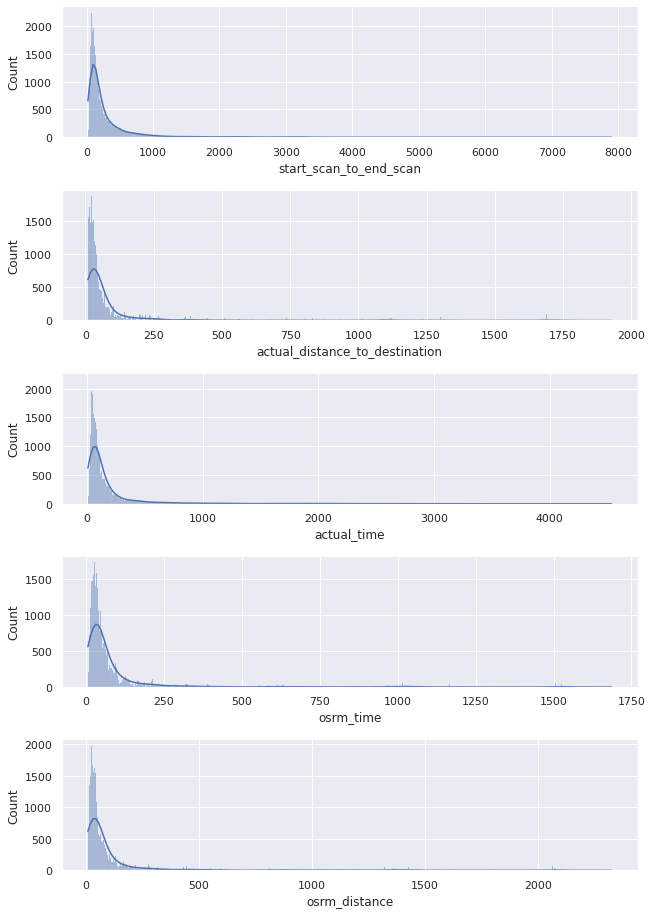

In [28]:
sns.set()
fig,axis= plt.subplots(5,1,figsize=(10,15))
sns.histplot(data = agg_on_trip_source_dest,x='start_scan_to_end_scan',kde=True,ax=axis[0])
sns.histplot(data=agg_on_trip_source_dest,x='actual_distance_to_destination',kde=True,ax=axis[1])
sns.histplot(data=agg_on_trip_source_dest,x='actual_time',kde=True,ax=axis[2])
sns.histplot(data=agg_on_trip_source_dest,x='osrm_time',kde=True,ax=axis[3])
sns.histplot(data=agg_on_trip_source_dest,x='osrm_distance',kde=True,ax=axis[4])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Outlier detection and Handling

In [29]:
agg_on_trip_source_dest.columns

Index(['route_type', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_date', 'od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'source_city', 'destination_city', 'source_state',
       'destination_state', 'segment_actual_time_cum', 'segment_osrm_time_cum',
       'segment_osrm_distance_cum'],
      dtype='object')

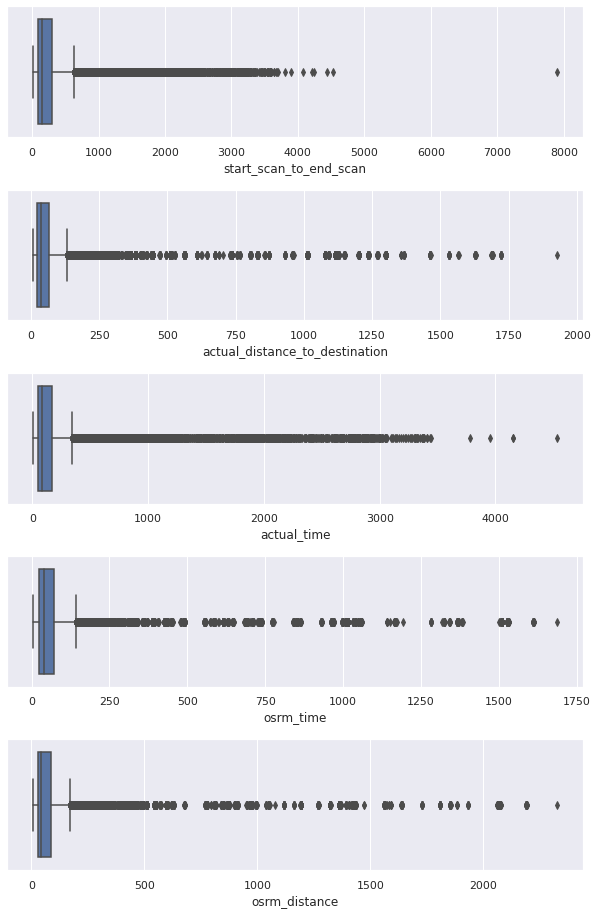

In [30]:
sns.set()
fig,axis= plt.subplots(5,1,figsize=(10,15))
sns.boxplot(data = agg_on_trip_source_dest,x='start_scan_to_end_scan',ax=axis[0])
sns.boxplot(data=agg_on_trip_source_dest,x='actual_distance_to_destination',ax=axis[1])
sns.boxplot(data=agg_on_trip_source_dest,x='actual_time',ax=axis[2])
sns.boxplot(data=agg_on_trip_source_dest,x='osrm_time',ax=axis[3])
sns.boxplot(data=agg_on_trip_source_dest,x='osrm_distance',ax=axis[4])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [31]:
def detect_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col_name] < fence_low) | (df[col_name] > fence_high)]
    return df_out

In [32]:
outlier_start_scan_to_end_scan = detect_outlier(agg_on_trip_source_dest,'start_scan_to_end_scan')
outlier_start_scan_to_end_scan

route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153671186247781647 IND209801AAA  IND209304AAA          Carting   
...                                                             ...   
trip-153860879439383883 IND562132AAA  IND000000ACB              FTL   
trip-153860880135634048 IND425405AAA  IND424006AAA              FTL   
trip-153860922975807074 IND508207AAB  IND507002AAA              FTL   
trip-153861014185597051 IND462022AAA  IND209304AAA              FTL   
trip-153861059679001096 IND208012AAA  IND209304AAA          Carting   

                                                         trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153671186247781647 IND209801AAA  IND209304AAA                     2018   
...                                                                     ...   
trip-153860879439383883 IND562132AAA  IND000000ACB                     2018   
trip-153860880135634048 IND425405AAA  IND424006AAA                     2018   
trip-153860922975807074 IND508207AAB  IND507002AAA                     2018   
trip-153861014185597051 IND462022AAA  IND209304AAA                     2018   
trip-153861059679001096 IND208012AAA  IND209304AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
                        IND562132AAA  IND000000ACB                        09   
trip-153671186247781647 IND209801AAA  IND209304AAA                        09   
...                                                                      ...   
trip-153860879439383883 IND562132AAA  IND000000ACB                        10   
trip-153860880135634048 IND425405AAA  IND424006AAA                        10   
trip-153860922975807074 IND508207AAB  IND507002AAA                        10   
trip-153861014185597051 IND462022AAA  IND209304AAA                        10   
trip-153861059679001096 IND208012AAA  IND209304AAA                        10   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
                        IND562132AAA  IND000000ACB                      12    
trip-153671186247781647 IND209801AAA  IND209304AAA                      12    
...                                                                     ...   
trip-153860879439383883 IND562132AAA  IND000000ACB                      03    
trip-153860880135634048 IND425405AAA  IND424006AAA                      03    
trip-153860922975807074 IND508207AAB  IND507002AAA                      03    
trip-153861014185597051 IND462022AAA  IND209304AAA                      03    
trip-153861059679001096 IND208012AAA  IND209304AAA                      03    

                                    

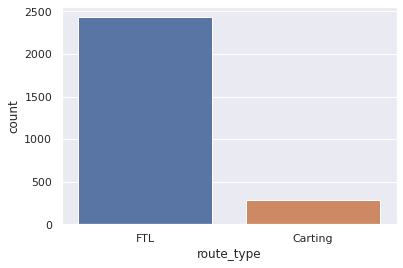

In [33]:
sns.countplot(x='route_type',data = outlier_start_scan_to_end_scan)

In [34]:
outlier_actual_distance_to_destination = detect_outlier(agg_on_trip_source_dest,'actual_distance_to_destination')
outlier_actual_distance_to_destination

route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153671121411074590 IND501359AAE  IND515004AAA              FTL   
...                                                             ...   
trip-153860840187622919 IND444005AAB  IND421302AAG              FTL   
trip-153860879439383883 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153861014185597051 IND206001AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   

                                                         trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153671121411074590 IND501359AAE  IND515004AAA                     2018   
...                                                                     ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                     2018   
trip-153860879439383883 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153861014185597051 IND206001AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
                        IND562132AAA  IND000000ACB                        09   
trip-153671121411074590 IND501359AAE  IND515004AAA                        09   
...                                                                      ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                        10   
trip-153860879439383883 IND000000ACB  IND160002AAC                        10   
                        IND562132AAA  IND000000ACB                        10   
trip-153861014185597051 IND206001AAA  IND000000ACB                        10   
                        IND462022AAA  IND209304AAA                        10   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
                        IND562132AAA  IND000000ACB                      12    
trip-153671121411074590 IND501359AAE  IND515004AAA                      12    
...                                                                     ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                      03    
trip-153860879439383883 IND000000ACB  IND160002AAC                      03    
                        IND562132AAA  IND000000ACB                      03    
trip-153861014185597051 IND206001AAA  IND000000ACB                      03    
                        IND462022AAA  IND209304AAA                      03    

                                    

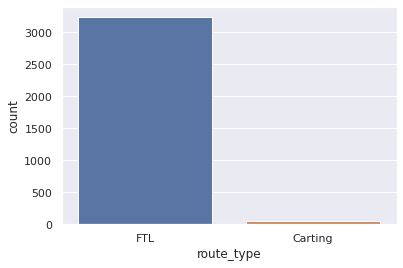

In [35]:
sns.countplot(x='route_type',data = outlier_actual_distance_to_destination)

In [36]:
outlier_actual_time = detect_outlier(agg_on_trip_source_dest,'actual_time')
outlier_actual_time

route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153671121411074590 IND501359AAE  IND515004AAA              FTL   
...                                                             ...   
trip-153860880135634048 IND425405AAA  IND424006AAA              FTL   
trip-153861007249500192 IND847404AAB  IND842001AAA              FTL   
trip-153861014185597051 IND206001AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153861059679001096 IND208012AAA  IND209304AAA          Carting   

                                                         trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153671121411074590 IND501359AAE  IND515004AAA                     2018   
...                                                                     ...   
trip-153860880135634048 IND425405AAA  IND424006AAA                     2018   
trip-153861007249500192 IND847404AAB  IND842001AAA                     2018   
trip-153861014185597051 IND206001AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153861059679001096 IND208012AAA  IND209304AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
                        IND562132AAA  IND000000ACB                        09   
trip-153671121411074590 IND501359AAE  IND515004AAA                        09   
...                                                                      ...   
trip-153860880135634048 IND425405AAA  IND424006AAA                        10   
trip-153861007249500192 IND847404AAB  IND842001AAA                        10   
trip-153861014185597051 IND206001AAA  IND000000ACB                        10   
                        IND462022AAA  IND209304AAA                        10   
trip-153861059679001096 IND208012AAA  IND209304AAA                        10   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
                        IND562132AAA  IND000000ACB                      12    
trip-153671121411074590 IND501359AAE  IND515004AAA                      12    
...                                                                     ...   
trip-153860880135634048 IND425405AAA  IND424006AAA                      03    
trip-153861007249500192 IND847404AAB  IND842001AAA                      03    
trip-153861014185597051 IND206001AAA  IND000000ACB                      03    
                        IND462022AAA  IND209304AAA                      03    
trip-153861059679001096 IND208012AAA  IND209304AAA                      03    

                                    

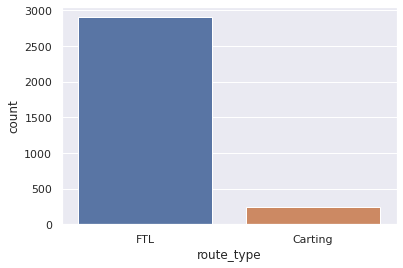

In [37]:
sns.countplot(x='route_type',data = outlier_actual_time)

In [38]:
outlier_osrm_time = detect_outlier(agg_on_trip_source_dest,'osrm_time')
outlier_osrm_time

route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153671121411074590 IND501359AAE  IND515004AAA              FTL   
...                                                             ...   
trip-153860840187622919 IND444005AAB  IND421302AAG              FTL   
trip-153860879439383883 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153861014185597051 IND206001AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   

                                                         trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153671121411074590 IND501359AAE  IND515004AAA                     2018   
...                                                                     ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                     2018   
trip-153860879439383883 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153861014185597051 IND206001AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
                        IND562132AAA  IND000000ACB                        09   
trip-153671121411074590 IND501359AAE  IND515004AAA                        09   
...                                                                      ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                        10   
trip-153860879439383883 IND000000ACB  IND160002AAC                        10   
                        IND562132AAA  IND000000ACB                        10   
trip-153861014185597051 IND206001AAA  IND000000ACB                        10   
                        IND462022AAA  IND209304AAA                        10   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
                        IND562132AAA  IND000000ACB                      12    
trip-153671121411074590 IND501359AAE  IND515004AAA                      12    
...                                                                     ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                      03    
trip-153860879439383883 IND000000ACB  IND160002AAC                      03    
                        IND562132AAA  IND000000ACB                      03    
trip-153861014185597051 IND206001AAA  IND000000ACB                      03    
                        IND462022AAA  IND209304AAA                      03    

                                    

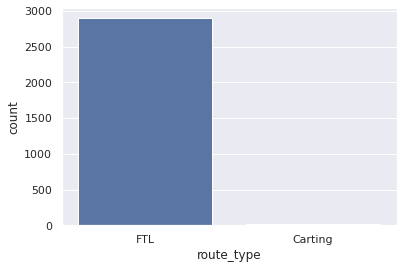

In [39]:
sns.countplot(x='route_type',data = outlier_osrm_time)

In [40]:
outlier_osrm_distance = detect_outlier(agg_on_trip_source_dest,'osrm_distance')
outlier_osrm_distance

route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153671121411074590 IND501359AAE  IND515004AAA              FTL   
...                                                             ...   
trip-153860840187622919 IND444005AAB  IND421302AAG              FTL   
trip-153860879439383883 IND000000ACB  IND160002AAC              FTL   
                        IND562132AAA  IND000000ACB              FTL   
trip-153861014185597051 IND206001AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   

                                                         trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153671121411074590 IND501359AAE  IND515004AAA                     2018   
...                                                                     ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                     2018   
trip-153860879439383883 IND000000ACB  IND160002AAC                     2018   
                        IND562132AAA  IND000000ACB                     2018   
trip-153861014185597051 IND206001AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
                        IND562132AAA  IND000000ACB                        09   
trip-153671121411074590 IND501359AAE  IND515004AAA                        09   
...                                                                      ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                        10   
trip-153860879439383883 IND000000ACB  IND160002AAC                        10   
                        IND562132AAA  IND000000ACB                        10   
trip-153861014185597051 IND206001AAA  IND000000ACB                        10   
                        IND462022AAA  IND209304AAA                        10   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
                        IND562132AAA  IND000000ACB                      12    
trip-153671121411074590 IND501359AAE  IND515004AAA                      12    
...                                                                     ...   
trip-153860840187622919 IND444005AAB  IND421302AAG                      03    
trip-153860879439383883 IND000000ACB  IND160002AAC                      03    
                        IND562132AAA  IND000000ACB                      03    
trip-153861014185597051 IND206001AAA  IND000000ACB                      03    
                        IND462022AAA  IND209304AAA                      03    

                                    

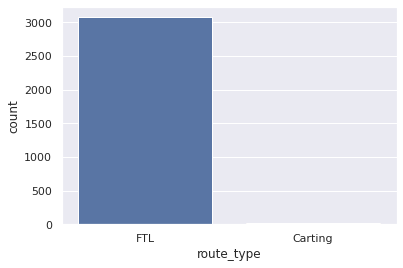

In [41]:
sns.countplot(x='route_type',data = outlier_osrm_distance)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result We can see almost all the outlier data points belong to FTL route type and FTL being long journeys will usually take long time. Since all the outliers are valid values, we are going to consider them in our analysis</div>

In [42]:
busiest_city_corridors = agg_on_trip_source_dest.groupby(['source_city',
                                                'destination_city']).size().reset_index().rename(columns={0:'count'})
busiest_city_corridors.sort_values(by='count',ascending=False).reset_index().head(10)

,index,source_city,destination_city,count
0,272,Bengaluru,Bengaluru,565
1,192,Bangalore,Bengaluru,492
2,340,Bhiwandi,Mumbai,407
3,270,Bengaluru,Bangalore,356
4,958,Hyderabad,Hyderabad,316
5,1530,Mumbai,Mumbai,286
6,1528,Mumbai,Bhiwandi,282
7,579,Delhi,Gurgaon,248
8,481,Chennai,Chennai,246
9,815,Gurgaon,Delhi,237


<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above table we can see the top busiest routes which includes bangalore, mumbai and hyderabad.</div>

In [43]:
busiest_city_corridors_dist_time = agg_on_trip_source_dest.groupby(['source_city',
                                            'destination_city'])['actual_time',
                                                    'actual_distance_to_destination'].agg('mean').reset_index()
pd.merge(busiest_city_corridors_dist_time,
         busiest_city_corridors,left_index=True,right_index=True).drop(['source_city_y',
                        'destination_city_y'],axis=1).sort_values(by='count',
                                ascending=False).reset_index().rename({'source_city_x':'source_city',
                                                                'destination_city_x':'destination_city'})

,index,source_city_x,destination_city_x,actual_time,actual_distance_to_destination,count
0,272,Bengaluru,Bengaluru,79.277876,29.075026,565
1,192,Bangalore,Bengaluru,77.674797,27.745791,492
2,340,Bhiwandi,Mumbai,80.120393,22.560310,407
3,270,Bengaluru,Bangalore,91.264045,28.346863,356
4,958,Hyderabad,Hyderabad,102.392405,24.610768,316
...,...,...,...,...,...,...
2365,1735,Pasighat,Gohpur,570.000000,215.406370,1
2366,1737,Patan,Radhanpur,140.000000,53.726334,1
2367,1741,Pathankot,Dalhousie,122.000000,39.798932,1
2368,1747,Patran,Samana,37.000000,26.829084,1


In [44]:
busiest_state_corridors = agg_on_trip_source_dest.groupby(['source_state',
                                            'destination_state']).size().reset_index().rename(columns={0:'count'})
busiest_state_corridors.sort_values(by='count',ascending=False).reset_index().head(10)

,index,source_state,destination_state,count
0,120,Maharashtra,Maharashtra,3255
1,93,Karnataka,Karnataka,3158
2,153,Tamil Nadu,Tamil Nadu,2021
3,172,Uttar Pradesh,Uttar Pradesh,1526
4,163,Telangana,Telangana,1315
5,182,West Bengal,West Bengal,1296
6,50,Gujarat,Gujarat,1279
7,12,Andhra Pradesh,Andhra Pradesh,1139
8,148,Rajasthan,Rajasthan,1054
9,29,Bihar,Bihar,1011


In [45]:
busiest_state_corridors_dist_time = agg_on_trip_source_dest.groupby(['source_state',
                                            'destination_state'])['actual_time',
                                            'actual_distance_to_destination'].agg('mean').reset_index()

pd.merge(busiest_state_corridors,busiest_state_corridors_dist_time,
         left_index=True,right_index=True).drop(['source_state_y','destination_state_y'],
                                                axis=1).sort_values(by='count',
                                                                    ascending=False).reset_index().rename(
    {'source_city_x':'source_city','destination_city_x':'destination_city'}).head(10)

,index,source_state_x,destination_state_x,count,actual_time,actual_distance_to_destination
0,120,Maharashtra,Maharashtra,3255,129.477419,48.333074
1,93,Karnataka,Karnataka,3158,92.926852,38.058320
2,153,Tamil Nadu,Tamil Nadu,2021,75.818407,34.846109
3,172,Uttar Pradesh,Uttar Pradesh,1526,136.305374,48.382655
4,163,Telangana,Telangana,1315,97.673004,42.062285
5,182,West Bengal,West Bengal,1296,136.176698,37.334884
6,50,Gujarat,Gujarat,1279,99.157936,48.589073
7,12,Andhra Pradesh,Andhra Pradesh,1139,97.304653,46.657201
8,148,Rajasthan,Rajasthan,1054,139.261860,64.128019
9,29,Bihar,Bihar,1011,163.715134,49.206346


<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above table we can see the top busiest state routes which includes Maharashtra, Karnataka and Tamil Nadu</div>

## Handling Categorical values

In [46]:
agg_on_trip_source_dest_encoder = pd.get_dummies(agg_on_trip_source_dest.route_type, prefix='route')
agg_on_trip_source_dest = agg_on_trip_source_dest.join(agg_on_trip_source_dest_encoder)
agg_on_trip_source_dest.rename({'route_Carting':'carting'},axis=1,inplace=True)
agg_on_trip_source_dest.drop('route_FTL',axis=1,inplace=True)
agg_on_trip_source_dest.drop('route_type',axis=1,inplace=True)
agg_on_trip_source_dest

trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671042288605164 IND561203AAB  IND562101AAA                     2018   
                        IND572101AAA  IND561203AAB                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
...                                                                     ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                     2018   
                        IND628613AAA  IND627005AAA                     2018   
                        IND628801AAA  IND628204AAA                     2018   
trip-153861118270144424 IND583119AAA  IND583101AAA                     2018   
                        IND583201AAA  IND583119AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671042288605164 IND561203AAB  IND562101AAA                        09   
                        IND572101AAA  IND561203AAB                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
...                                                                      ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                        10   
                        IND628613AAA  IND627005AAA                        10   
                        IND628801AAA  IND628204AAA                        10   
trip-153861118270144424 IND583119AAA  IND583101AAA                        10   
                        IND583201AAA  IND583119AAA                        10   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671042288605164 IND561203AAB  IND562101AAA                      12    
                        IND572101AAA  IND561203AAB                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
...                                                                     ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                      03    
                        IND628613AAA  IND627005AAA                      03    
                        IND628801AAA  IND628204AAA                      03    
trip-153861118270144424 IND583119AAA  IND583101AAA                      03    
                        IND583201AAA  IND583119AAA                      03    

                                                          od_total_time  \
trip_uuid               source_center destination_center                  
trip-153671041653548748 IND209304AAA  IND000000ACB               1260.0   
                        IND462022AAA  IND209304AAA                999.0   
trip-153671042288605164 IND561203AAB  IND562101AAA                 58.0   
                        IND572101AAA  IND561203AAB                122.0   
trip-153671043369099517 IND000000ACB  IND160002AAC                834.0   
...                                                                 ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                 62.0   
                        IND628613AAA  IND627005AAA                 91.0   
                        IND628801AAA  IND628204AAA                 44.0   
trip-153861118270144424 IND583119AAA  IND583101AAA                287.0   
                        IND583201AAA  IND583119AAA          

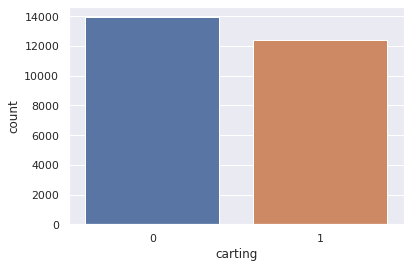

In [47]:
sns.countplot(data=agg_on_trip_source_dest,x='carting')

## 2 sample T test to check if od_total_time and start_scan_to_end_scan are same or not

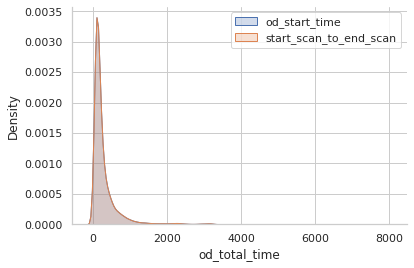

In [48]:
sns.set_style('whitegrid')
sns.kdeplot(data=agg_on_trip_source_dest, x='od_total_time',fill=True,label='od_start_time')
sns.kdeplot(data=agg_on_trip_source_dest,x='start_scan_to_end_scan',fill=True,label='start_scan_to_end_scan')
sns.despine()
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is not normal for both the groups. Also we can see that od_start_time and start_scan_to_end_scan completely overlap each other.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is not normally distributed for both groups(i.e od_total_time and start_scan_to_end_scan)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: The means of od_start_time and start_scan_to_end_scan are similar.
    - Alternate Hypothesis: The means of od_start_time and start_scan_to_end_scan are different.
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample T-test since we need to compare mean of two independendent group. The 2 sample t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other since each both the times are calculated independently.
- We assume that both the groups are obtained from random sampling
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is somewhat similar for both groups

In [49]:
od_total_time_var = np.var(agg_on_trip_source_dest['od_total_time'])
start_scan_to_end_scan_variance = np.var(agg_on_trip_source_dest['start_scan_to_end_scan'])
print("variance of od_total_time is {} and variance of start_scan_to_end_scan is {}".format(od_total_time_var,
                                                                                    start_scan_to_end_scan_variance))

variance of od_total_time is 194083.04130631435 and variance of start_scan_to_end_scan is 194083.04130631435


### Applying Log normal transformation to convert the data to gaussian

In [50]:
def normality(data):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

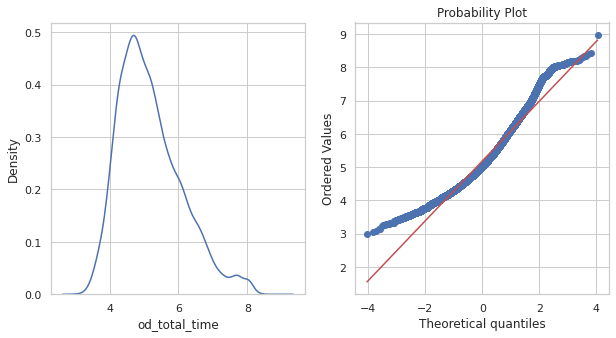

In [51]:
od_total_time_transformed = np.log(agg_on_trip_source_dest['od_total_time'])
start_scan_to_end_scan_transformed = np.log(agg_on_trip_source_dest['start_scan_to_end_scan'])
normality(od_total_time_transformed)

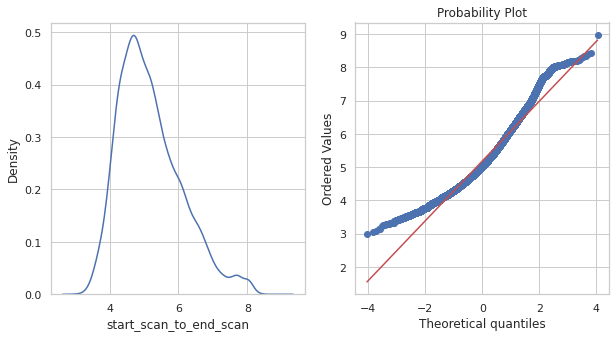

In [52]:
normality(start_scan_to_end_scan_transformed)

In [53]:
stats.ttest_ind(od_total_time_transformed,start_scan_to_end_scan_transformed)

Ttest_indResult(statistic=0.0, pvalue=1.0)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 1 which is greater than our significance value alpha. So based on this
    We can say that we fail to reject the Null Hypothesis. It means that there is od_total_time and start_scan_to_end_scan are same.
</div>

## 2 sample T test to check if actual_time and osrm_time are same or not

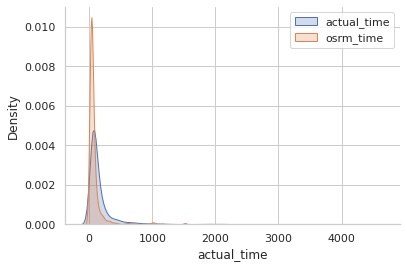

In [54]:
sns.set_style('whitegrid')
sns.kdeplot(data=agg_on_trip_source_dest, x='actual_time',fill=True,label='actual_time')
sns.kdeplot(data=agg_on_trip_source_dest,x='osrm_time',fill=True,label='osrm_time')
sns.despine()
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is not normal for both the groups. Also we can see that actual_time and osrm_time don't completely overlap each other.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is not normally distributed for both groups(i.e actual_time and osrm_time)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: The means of actual_time and osrm_time are similar.
    - Alternate Hypothesis: The means of actual_time and osrm_time are different.
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample T-test since we need to compare mean of two independendent group. The 2 sample t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other since each both the times are calculated independently.
- We assume that both the groups are obtained from random sampling
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is somewhat similar for both groups

In [55]:
actual_time_var = np.var(agg_on_trip_source_dest['actual_time'])
osrm_time_variance = np.var(agg_on_trip_source_dest['osrm_time'])
print("variance of actual_time_var is {} and variance of osrm_time_variance is {}".format(actual_time_var,
                                                                                          osrm_time_variance))

variance of actual_time_var is 148106.70707614612 and variance of osrm_time_variance is 34253.46400403046


### Applying Log normal transformation to convert the data to gaussian

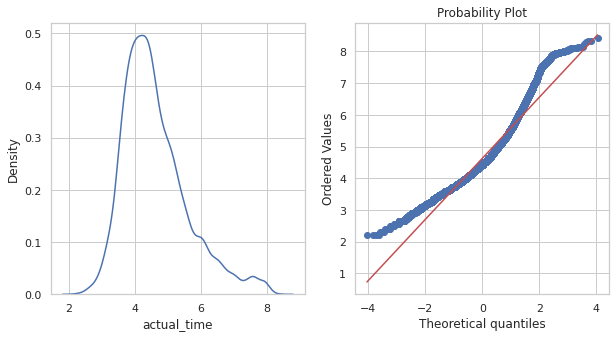

In [56]:
actual_time_transformed = np.log(agg_on_trip_source_dest['actual_time'])
osrm_time_transformed = np.log(agg_on_trip_source_dest['osrm_time'])
normality(actual_time_transformed)

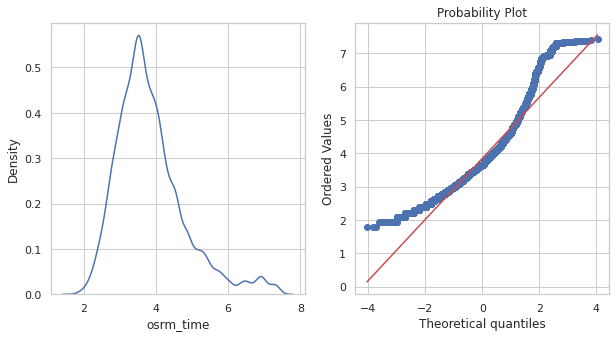

In [57]:
normality(osrm_time_transformed)

In [58]:
stats.ttest_ind(actual_time_transformed,osrm_time_transformed)

Ttest_indResult(statistic=91.75651556695851, pvalue=0.0)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 0 which is less than our significance value alpha. So based on this
    We can say that we reject the Null Hypothesis. It means that there is actual_time and osrm_time are different.
</div>

## 2 sample T test to check if actual_time and segment_actual_time are same or not

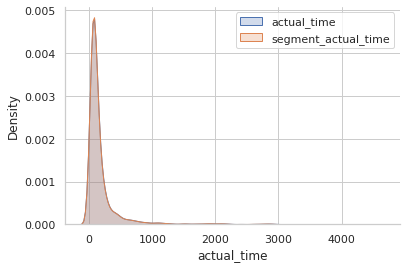

In [59]:
sns.set_style('whitegrid')
sns.kdeplot(data=agg_on_trip_source_dest, x='actual_time',fill=True,label='actual_time')
sns.kdeplot(data=agg_on_trip_source_dest,x='segment_actual_time_cum',fill=True,label='segment_actual_time')
plt.legend()
sns.despine()
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is not normal for both the groups. Also we can see that actual_time and segment_actual_time don't completely overlap each other.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is not normally distributed for both groups(i.e actual_time and segment_actual_time)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: The means of actual_time and segment_actual_time are similar.
    - Alternate Hypothesis: The means of actual_time and segment_actual_time are different.
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample T-test since we need to compare mean of two independendent group. The 2 sample t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other since each both the times are calculated independently.
- We assume that both the groups are obtained from random sampling
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is somewhat similar for both groups

In [60]:
actual_time_var = np.var(agg_on_trip_source_dest['actual_time'])
segment_actual_time_variance = np.var(agg_on_trip_source_dest['segment_actual_time_cum'])
print("variance of actual_time_var is {} and variance of segment_actual_time_variance is {}".format(actual_time_var,
                                                                                    segment_actual_time_variance))

variance of actual_time_var is 148106.70707614612 and variance of segment_actual_time_variance is 145371.38348607288


### Applying Log normal transformation to convert the data to gaussian

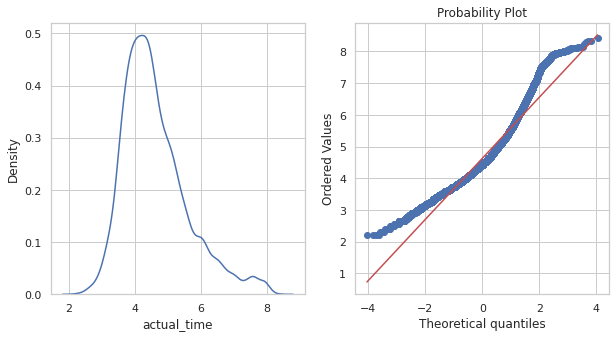

In [61]:
actual_time_transformed = np.log(agg_on_trip_source_dest['actual_time'])
segment_actual_time_transformed = np.log(agg_on_trip_source_dest['segment_actual_time_cum'])
normality(actual_time_transformed)

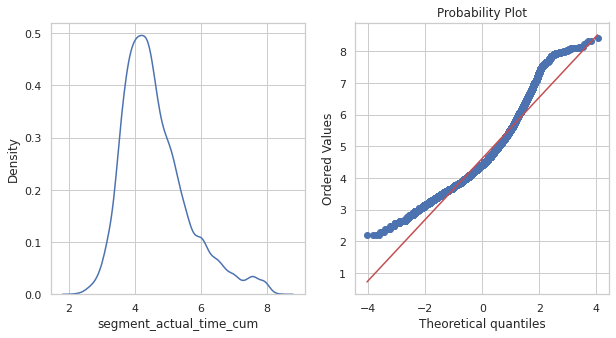

In [62]:
normality(segment_actual_time_transformed)

In [63]:
stats.ttest_ind(actual_time_transformed,segment_actual_time_transformed)

Ttest_indResult(statistic=1.1719659905322306, pvalue=0.24121600541669044)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 0.24 which is greater than our significance value alpha. So based on this
    We can say that we fail to reject the Null Hypothesis. It means that there is actual_time and segment_actual_time are same.
</div>

## 2 sample T test to check if actual_time and segment_actual_time are same or not

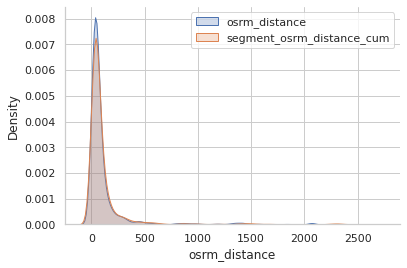

In [64]:
sns.set_style('whitegrid')
sns.kdeplot(data=agg_on_trip_source_dest, x='osrm_distance',fill=True,label='osrm_distance')
sns.kdeplot(data=agg_on_trip_source_dest,x='segment_osrm_distance_cum',fill=True,label='segment_osrm_distance_cum')
plt.legend()
sns.despine()
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is not normal for both the groups. Also we can see that osrm_distance and segment_osrm_distance_cum don't completely overlap each other.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is not normally distributed for both groups(i.e osrm_distance and segment_osrm_distance_cum)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: The means of actual_time and segment_actual_time are similar.
    - Alternate Hypothesis: The means of osrm_distance and segment_osrm_distance_cum are different.
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample T-test since we need to compare mean of two independendent group. The 2 sample t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other since each both the times are calculated independently.
- We assume that both the groups are obtained from random sampling
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is somewhat similar for both groups

In [65]:
osrm_distance_var = np.var(agg_on_trip_source_dest['osrm_distance'])
segment_osrm_distance_cum_var = np.var(agg_on_trip_source_dest['segment_osrm_distance_cum'])
print("variance of osrm_distance_var is {} and variance of segment_osrm_distance_cum_var is {}".format(
    osrm_distance_var,segment_osrm_distance_cum_var))

variance of osrm_distance_var is 64398.681296934046 and variance of segment_osrm_distance_cum_var is 81754.32592611018


### Applying Log normal transformation to convert the data to gaussian

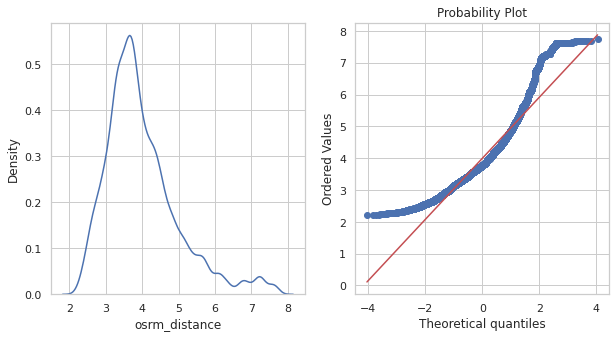

In [66]:
osrm_distance_transformed = np.log(agg_on_trip_source_dest['osrm_distance'])
segment_osrm_distance_cum_transformed = np.log(agg_on_trip_source_dest['segment_osrm_distance_cum'])
normality(osrm_distance_transformed)

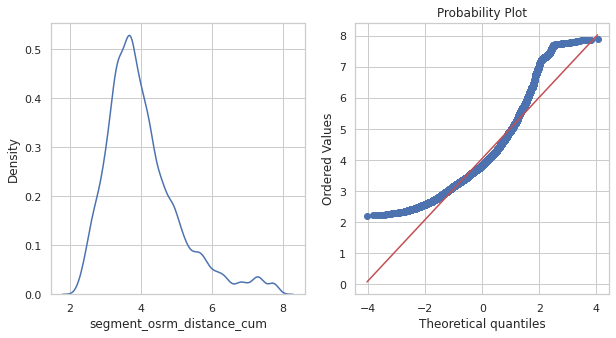

In [67]:
normality(segment_osrm_distance_cum_transformed)

In [68]:
stats.ttest_ind(osrm_distance_transformed,segment_osrm_distance_cum_transformed)

Ttest_indResult(statistic=-6.016679309589272, pvalue=1.792010384210536e-09)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 1.79^(-9) which is less than our significance value alpha. So based on this
    We can say that we reject the Null Hypothesis. It means that there is osrm_distance and segment_osrm_distance_cum are different.
</div>

## 2 sample T test to check if osrm_time_cum and segment_osrm_time_cum are same or not

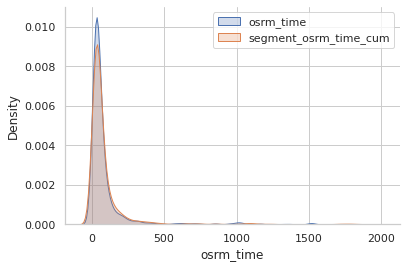

In [69]:
sns.set_style('whitegrid')
sns.kdeplot(data=agg_on_trip_source_dest, x='osrm_time',fill=True,label='osrm_time')
sns.kdeplot(data=agg_on_trip_source_dest,x='segment_osrm_time_cum',fill=True,label='segment_osrm_time_cum')
plt.legend()
sns.despine()
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is not normal for both the groups. Also we can see that osrm_time and segment_osrm_time_cum don't completely overlap each other.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is not normally distributed for both groups(i.e osrm_time and segment_osrm_time_cum)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: The means of actual_time and segment_osrm_time_cum are similar.
    - Alternate Hypothesis: The means of osrm_time and segment_osrm_distance_cum are different.
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample T-test since we need to compare mean of two independendent group. The 2 sample t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other since each both the times are calculated independently.
- We assume that both the groups are obtained from random sampling
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar. Below we'll see that the variance is somewhat similar for both groups

In [70]:
osrm_time_var = np.var(agg_on_trip_source_dest['osrm_time'])
segment_osrm_time_var = np.var(agg_on_trip_source_dest['segment_osrm_time_cum'])
print("variance of osrm_time_var is {} and variance of segment_osrm_time_cum_var is {}".format(osrm_time_var,
                                                                                               segment_osrm_time_var))

variance of osrm_time_var is 34253.46400403046 and variance of segment_osrm_time_cum_var is 46503.567775992764


### Applying Log normal transformation to convert the data to gaussian

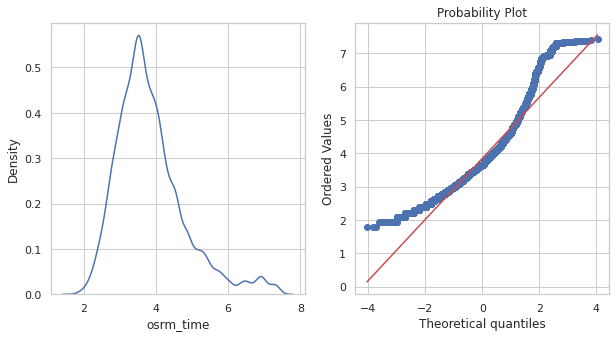

In [71]:
osrm_time_transformed = np.log(agg_on_trip_source_dest['osrm_time'])
segment_osrm_time_cum_transformed = np.log(agg_on_trip_source_dest['segment_osrm_time_cum'])
normality(osrm_time_transformed)

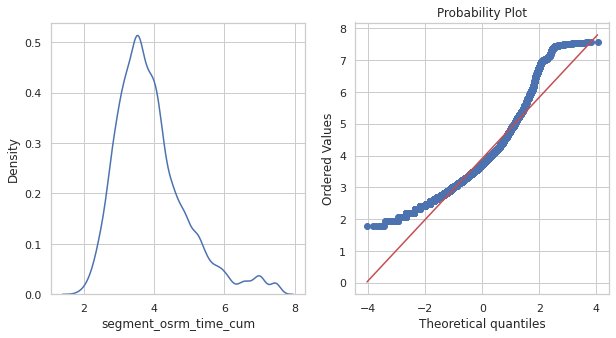

In [72]:
normality(segment_osrm_time_cum_transformed)

In [73]:
stats.ttest_ind(osrm_time_transformed,segment_osrm_time_cum_transformed)

Ttest_indResult(statistic=-7.264652594570266, pvalue=3.7915395546872833e-13)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 3.3^(-13) which is less than our significance value alpha. So based on this
    We can say that we reject the Null Hypothesis. It means that there is osrm_time and segment_osrm_time_cum are different.
</div>

## Normalization

In [74]:
normalized_agg_on_trip_source_dest = agg_on_trip_source_dest.copy()
columns_to_normalize = ['od_total_time','start_scan_to_end_scan','actual_distance_to_destination',
                       'actual_time','osrm_time','osrm_distance','segment_actual_time_cum',
                       'segment_osrm_time_cum','segment_osrm_distance_cum']
normalized_agg_on_trip_source_dest[columns_to_normalize] = preprocessing.normalize(
                                                            agg_on_trip_source_dest[columns_to_normalize])
normalized_agg_on_trip_source_dest

trip_creation_year  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                     2018   
                        IND462022AAA  IND209304AAA                     2018   
trip-153671042288605164 IND561203AAB  IND562101AAA                     2018   
                        IND572101AAA  IND561203AAB                     2018   
trip-153671043369099517 IND000000ACB  IND160002AAC                     2018   
...                                                                     ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                     2018   
                        IND628613AAA  IND627005AAA                     2018   
                        IND628801AAA  IND628204AAA                     2018   
trip-153861118270144424 IND583119AAA  IND583101AAA                     2018   
                        IND583201AAA  IND583119AAA                     2018   

                                                         trip_creation_month  \
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                        09   
                        IND462022AAA  IND209304AAA                        09   
trip-153671042288605164 IND561203AAB  IND562101AAA                        09   
                        IND572101AAA  IND561203AAB                        09   
trip-153671043369099517 IND000000ACB  IND160002AAC                        09   
...                                                                      ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                        10   
                        IND628613AAA  IND627005AAA                        10   
                        IND628801AAA  IND628204AAA                        10   
trip-153861118270144424 IND583119AAA  IND583101AAA                        10   
                        IND583201AAA  IND583119AAA                        10   

                                                         trip_creation_date  \
trip_uuid               source_center destination_center                      
trip-153671041653548748 IND209304AAA  IND000000ACB                      12    
                        IND462022AAA  IND209304AAA                      12    
trip-153671042288605164 IND561203AAB  IND562101AAA                      12    
                        IND572101AAA  IND561203AAB                      12    
trip-153671043369099517 IND000000ACB  IND160002AAC                      12    
...                                                                     ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                      03    
                        IND628613AAA  IND627005AAA                      03    
                        IND628801AAA  IND628204AAA                      03    
trip-153861118270144424 IND583119AAA  IND583101AAA                      03    
                        IND583201AAA  IND583119AAA                      03    

                                                          od_total_time  \
trip_uuid               source_center destination_center                  
trip-153671041653548748 IND209304AAA  IND000000ACB             0.540677   
                        IND462022AAA  IND209304AAA             0.463470   
trip-153671042288605164 IND561203AAB  IND562101AAA             0.479966   
                        IND572101AAA  IND561203AAB             0.497962   
trip-153671043369099517 IND000000ACB  IND160002AAC             0.530788   
...                                                                 ...   
trip-153861115439069069 IND628204AAA  IND627657AAA             0.429378   
                        IND628613AAA  IND627005AAA             0.407884   
                        IND628801AAA  IND628204AAA             0.538410   
trip-153861118270144424 IND583119AAA  IND583101AAA             0.538539   
                        IND583201AAA  IND583119AAA          

## Recommendations

<div class="alert alert-block alert-success">
Based on above Analysis, following recommendations can be made:<br>
    
* Most of the trips are taking place in tier 1 cities like bangalore, mumbai and hyderabad and are mostly inter city. There are not many interstate delhiveries taking place. Team can focus on inter state delhiveries since it can generate more revenue due to long distance parcels.<br>
    
* The average delivery time in west bengal is more in comparison to other states. Team can focus on reducing this delivery time.<br>
    
* osrm_time and segment_osrm_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.<br>
* The actual time taken to deliver and the one predicted by osrm are not same. Team needs to improve this prediction modes so as to give more accurate predictions.<br>
    
* The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance,
    traffic and other factors. Team needs to look into it.<br>
</div>